## Create a VGG network

In this exercise, you will build a class that implements a VGG network and then train it to classify images of cats and dogs. The model will look something like this:

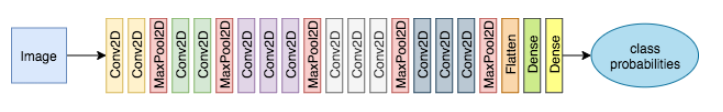

It is primarily made up of a series of Conv2D layers followed by a softmax activated layers to classify the image. As you can see, this will be a handful and the code will look huge if you specify each layer individually. As shown in the lectures, you can instead use model subclassing to build complex architectures. You can encapsulate repeating parts of a network then reuse that code when building the final model. You will get to practice that in this exercise. Let's get started!

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import utils

## Create named-variables dynamically

In this assignment, you will see the use of the Python function vars(). This will allow you to use a for loop to define and set multiple variables with a similar name, such as var1, var2, var3.

Please go through the following examples to get familiar with vars(), as you will use it when building the VGG model.

- You'll start by defining a class MyClass
- It contains one variable var1.
- Create an object of type MyClass.

In [2]:
# Define a small class MyClass
class MyClass:
    def __init__(self):
        # One class variable 'a' is set to 1
        self.var1 = 1

# Create an object of type MyClass()
my_obj = MyClass()

Python classes have an attribute called __dict__.

__dict__ is a Python dictionary that contains the object's instance variables and values as key value pairs.

In [3]:
my_obj.__dict__

{'var1': 1}

If you call vars() and pass in an object, it will call the object's __dict__ attribute, which is a Python dictionary containing the object's instance variables and their values as ke

In [4]:
vars(my_obj)

{'var1': 1}

In [5]:
# https://github.com/ashishpatel26/TensorFlow-Advanced-Techniques-Specialization/blob/main/Course%201%20-%20Custom%20Models%2C%20Layers%2C%20and%20Loss%20Functions%20with%20TensorFlow/Week%204/C1W4_Assignment.ipynb

You may be familiar with adding new variable like this:

In [6]:
# Add a new instance variable and give it a value
my_obj.var2 = 2

# Calls vars() again to see the object's instance variables
vars(my_obj)

{'var1': 1, 'var2': 2}

Here is another way that you can add an instance variable to an object, using vars().

- Retrieve the Python dictionary __dict__ of the object using vars(my_obj).
- Modify this __dict__ dictionary using square bracket notation and passing in the variable's name as a string: ['var3'] = 3

In [7]:
# Call vars, passing in the object.  Then access the __dict__ dictionary using square brackets
vars(my_obj)['var3'] = 3

# Call vars() to see the object's instance variables
vars(my_obj)

{'var1': 1, 'var2': 2, 'var3': 3}

## Why this is helpful!

You may be wondering why you would need another way to access an object's instance variables.

- Notice that when using vars(), you can now pass in the name of the variable var3 as a string.
- What if you plan to use several variables that are similarly named (var4, var5 ... var9) and wanted a convenient way to access them by incrementing a number?

Try this!

In [8]:
# Use a for loop to increment the index 'i'
for i in range(4,10):
    # Format a string that is var
    vars(my_obj)[f'var{i}'] = 0
    
# View the object's instance variables!
vars(my_obj)

{'var1': 1,
 'var2': 2,
 'var3': 3,
 'var4': 0,
 'var5': 0,
 'var6': 0,
 'var7': 0,
 'var8': 0,
 'var9': 0}

There are couple equivalent ways in Python to format a string. Here are two of those ways:

- f-string: f"var{i}"
- .format: "var{}".format(i)

In [9]:
# Format a string using f-string notation
i=1
print(f"var{i}")

# Format a string using .format notation
i=2
print("var{}".format(i))

var1
var2


You can access the variables of a class inside the class definition using vars(self)

In [10]:
# Define a small class MyClass
class MyClass:
    def __init__(self):
        # Use vars(self) to access the class's dictionary of variables
        vars(self)['var1'] = 1

# Create an object of type MyClass()
my_obj = MyClass()
vars(my_obj)

{'var1': 1}

You'll see this in the upcoming code. Now you'll start building the VGG network!

## Create a generic VGG block (TODO)

The VGG Network has blocks of layers, where each block has a varied number of layers.

In order to create blocks of layers that have a customizable number of conv2D layers, you'll define a class Block, which can generate a customizable block of layers

### __init__

In the constructor __init__, store the conv2D parameters and also define the number of conv2D layers using the parameters passed into __init__.

- Store the filters, kernel_size, and repetitions as class variables so that they can be used later in the call function.
- Using a for loop, define a number of Conv2D Conv2D layers, based on the number of repetitions desired for this block.

    - You can define each conv2D layer using vars and string formatting to create conv2D_0, conv2D_1, conv2D_3 etc.
    - Set these four parameters of Conv2D:
        - filters
        - kernel_size
        - activation: set this to 'relu'
        - padding: set this to 'same' (default pading is 'valid').
    - Define the MaxPool2D layer that follows these Conv2D layers.

        - Set the following parameters for MaxPool2D:
            - pool_size: this will be a tuple with two values.
            - strides: this will also be a tuple with two values.
                
### call

In call, you will connect the layers together.

- The 0-th conv2D layer, conv2D_0, immediately follows the inputs.
- For conv2D layers 1,2 and onward, you can use a for loop to connect conv2D_1 to conv2D_0, and connect conv2D_2 to conv2D_1, and so on.
- After connecting all of the conv2D_i layers, add connect the max_pool layer and return the max_pool layer.

In [11]:
# Please uncomment all lines in this cell and replace those marked with `# YOUR CODE HERE`.
# You can select all lines in this code cell with Ctrl+A (Windows/Linux) or Cmd+A (Mac), then press Ctrl+/ (Windows/Linux) or Cmd+/ (Mac) to uncomment.



class Block(tf.keras.Model):
    def __init__(self, filters, kernel_size, repetitions, pool_size=2, strides=2):
        super(Block, self).__init__()
        self.filters = filters
        self.kernel_size = kernel_size
        self.repetitions = repetitions
        
        # Define a conv2D_0, conv2D_1, etc based on the number of repetitions
        for i in range(repetitions):
            
            # Define a Conv2D layer, specifying filters, kernel_size, activation and padding.
            vars(self)[f'conv2D_{i}'] = tf.keras.layers.Conv2D(self.filters, 
                                                               self.kernel_size,
                                                               activation='relu',
                                                               padding='same')
        
        # Define the max pool layer that will be added after the Conv2D blocks
        self.max_pool = tf.keras.layers.MaxPool2D(pool_size=pool_size,
                                                  strides=strides,
                                                  padding='same')
  
    def call(self, inputs):
        # access the class's conv2D_0 layer
        conv2D_0 = vars(self)['conv2D_0']
        
        # Connect the conv2D_0 layer to inputs
        x = conv2D_0(inputs)

        # for the remaining conv2D_i layers from 1 to `repetitions` they will be connected to the previous layer
        for i in range(1, self.repetitions):
            # access conv2D_i by formatting the integer `i`. (hint: check how these were saved using `vars()` earlier)
            conv2D_i = vars(self)[f'conv2D_{i}']
            
            # Use the conv2D_i and connect it to the previous layer
            x = conv2D_i(x)

        # Finally, add the max_pool layer
        max_pool = self.max_pool
        
        return max_pool

In [ ]:
# utils.test_block_class(Block)

## Create the Custom VGG network (TODO)

This model stack has a series of VGG blocks, which can be created using the Block class that you defined earlier.

### __init__
- Recall that the __init__ constructor of Block takes several function parameters,
    - filters, kernel_size, repetitions: you'll set these.
    - kernel_size and strides: you can use the default values.
- For blocks a through e, build the blocks according to the following specifications:
- block_a: 64 filters, kernel_size 3, repetitions 2
- block_b: 128 filters, kernel_size 3, repetitions 2
- block_c: 256 filters, kernel_size 3, repetitions 3
- block_d: 512 filters, kernel_size 3, repetitions 3
- block_e: 512 filters, kernel_size 3, repetitions 3

After block 'e', add the following layers:

- flatten: use Flatten.
- fc: create a fully connected layer using Dense. Give this 256 units, and a 'relu' activation.
- classifier: create the classifier using a Dense layer. The number of units equals the number of classes. For multi-class classification, use a 'softmax' activation.

### call

Connect these layers together using the functional API syntax:

- inputs
- block_a
- block_b
- block_c
- block_d
- block_e
- flatten
- fc
- classifier

Return the classifier layer.

In [14]:
# Please uncomment all lines in this cell and replace those marked with `# YOUR CODE HERE`.
# You can select all lines in this code cell with Ctrl+A (Windows/Linux) or Cmd+A (Mac), then press Ctrl+/ (Windows/Linux) or Cmd+/ (Mac) to uncomment.



class MyVGG(tf.keras.Model):

    def __init__(self, num_classes):
        super(MyVGG, self).__init__()

        # Creating blocks of VGG with the following 
        # (filters, kernel_size, repetitions) configurations
        self.block_a = Block(64, 3, 2)
        self.block_b = Block(128, 3, 2)
        self.block_c = Block(256, 3, 3)
        self.block_d = Block(512, 3, 3)
        self.block_e = Block(512, 3, 3)

        # Classification head
        # Define a Flatten layer
        self.flatten = tf.keras.layers.Flatten()
        # Create a Dense layer with 256 units and ReLU as the activation function
        self.fc = tf.keras.layers.Dense(256, activation='relu')
        # Finally add the softmax classifier using a Dense layer
        self.classifier = tf.keras.layers.Dense(num_classes, activation='softmax')

    def call(self, inputs):
        # Chain all the layers one after the other
        x = self.block_a(inputs)
        x = self.block_b(x)
        x = self.block_c(x)
        x = self.block_d(x)
        x = self.block_e(x)
        x = self.flatten
        x = self.fc
        x = self.classifier
        return x

In [ ]:
# utils.test_myvgg_class(MyVGG, Block)

## Load data and train the VGG network (Optional)
You can now load the dataset and proceed to train your VGG network.

- This will take a few minutes to complete and is not required to complete the assignment.
- You can submit your work before starting the training.

In [15]:
dataset = tfds.load('cats_vs_dogs', split=tfds.Split.TRAIN, data_dir='data/')

# Initialize VGG with the number of classes 
vgg = MyVGG(num_classes=2)

# Compile with losses and metrics
vgg.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define preprocessing function
def preprocess(features):
    # Resize and normalize
    image = tf.image.resize(features['image'], (224, 224))
    return tf.cast(image, tf.float32) / 255., features['label']

# Apply transformations to dataset
dataset = dataset.map(preprocess).batch(32)

# Train the custom VGG model
vgg.fit(dataset, epochs=10)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling data\cats_vs_dogs\4.0.0.incompleteIZUH7Q\cats_vs_dogs-train.tfrecord*...:   0%|          | 0/23262 […

Dataset cats_vs_dogs downloaded and prepared to data/cats_vs_dogs\4.0.0. Subsequent calls will reuse this data.
Epoch 1/10


TypeError: in user code:

    File "C:\Users\USER\anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\USER\anaconda3\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\USER\anaconda3\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\USER\anaconda3\lib\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\USER\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\USER\AppData\Local\Temp\__autograph_generated_filer9ixz_lc.py", line 11, in tf__call
        x = ag__.converted_call(ag__.ld(self).block_b, (ag__.ld(x),), None, fscope)
    File "C:\Users\USER\AppData\Local\Temp\__autograph_generated_filew_5t3d1k.py", line 11, in tf__call
        x = ag__.converted_call(ag__.ld(conv2D_0), (ag__.ld(inputs),), None, fscope)

    TypeError: Exception encountered when calling layer "my_vgg" (type MyVGG).
    
    in user code:
    
        File "C:\Users\USER\AppData\Local\Temp\ipykernel_7948\265706601.py", line 30, in call  *
            x = self.block_b(x)
        File "C:\Users\USER\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler  **
            raise e.with_traceback(filtered_tb) from None
        File "C:\Users\USER\AppData\Local\Temp\__autograph_generated_filew_5t3d1k.py", line 11, in tf__call
            x = ag__.converted_call(ag__.ld(conv2D_0), (ag__.ld(inputs),), None, fscope)
    
        TypeError: Exception encountered when calling layer "block_1" (type Block).
        
        in user code:
        
            File "C:\Users\USER\AppData\Local\Temp\ipykernel_7948\3106513807.py", line 32, in call  *
                x = conv2D_0(inputs)
            File "C:\Users\USER\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler  **
                raise e.with_traceback(filtered_tb) from None
            File "C:\Users\USER\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 197, in assert_input_compatibility
                raise TypeError(f'Inputs to a layer should be tensors. Got: {x}')
        
            TypeError: Inputs to a layer should be tensors. Got: <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x000002D371932460>
        
        
        Call arguments received by layer "block_1" (type Block):
          • inputs=<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x000002D371932460>
    
    
    Call arguments received by layer "my_vgg" (type MyVGG):
      • inputs=tf.Tensor(shape=(None, 224, 224, 3), dtype=float32)
